In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, CategoricalNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('/content/fashion_sustainability_cleaned_final.csv')

# Use Eco_Friendly_Manufacturing as the target label; drop rows with missing target values
df = df.dropna(subset=['Eco_Friendly_Manufacturing'])

# Drop the 'Brand_Name' column
df = df.drop('Brand_Name', axis=1)

# For this example, we select a set of categorical features.
features = ['Country', 'Sustainability_Rating', 'Material_Type',
            'Recycling_Programs', 'Product_Lines', 'Market_Trend', 'Certifications']

X = df[features]
y = df['Eco_Friendly_Manufacturing']

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [2]:
X_train

,Country,Sustainability_Rating,Material_Type,Recycling_Programs,Product_Lines,Market_Trend,Certifications
4569,UK,A,Bamboo Fabric,No,5,Stable,Fair Trade
2304,France,C,Vegan Leather,No,20,Growing,B Corp
1609,France,A,Tencel,No,15,Growing,B Corp
1238,USA,B,Bamboo Fabric,No,1,Declining,Cradle to Cradle
903,USA,B,Organic Cotton,No,15,Growing,OEKO-TEX
...,...,...,...,...,...,...,...
4426,Japan,A,Hemp,Yes,17,Declining,GOTS
466,USA,C,Recycled Polyester,No,13,Stable,B Corp
3092,Germany,D,Bamboo Fabric,No,20,Growing,GOTS
3772,India,A,Vegan Leather,Yes,4,Stable,B Corp


In [3]:
X_test


,Country,Sustainability_Rating,Material_Type,Recycling_Programs,Product_Lines,Market_Trend,Certifications
4872,UK,B,Organic Cotton,No,9,Growing,OEKO-TEX
1025,India,B,Recycled Polyester,No,5,Declining,Fair Trade
3192,Japan,C,Organic Cotton,Yes,18,Declining,GOTS
2894,UK,C,Vegan Leather,Yes,18,Stable,Cradle to Cradle
4392,India,C,Hemp,No,12,Growing,Fair Trade
...,...,...,...,...,...,...,...
2487,USA,D,Organic Cotton,No,14,Declining,B Corp
912,UK,D,Bamboo Fabric,Yes,9,Declining,B Corp
4233,Brazil,D,Tencel,No,3,Stable,Fair Trade
4468,Australia,B,Organic Cotton,Yes,4,Stable,GOTS


In [4]:
 y_train

,Eco_Friendly_Manufacturing
4569,No
2304,Yes
1609,No
1238,No
903,No
...,...
4426,Yes
466,Yes
3092,No
3772,Yes


In [5]:
y_test

,Eco_Friendly_Manufacturing
4872,Yes
1025,No
3192,Yes
2894,No
4392,No
...,...
2487,No
912,No
4233,Yes
4468,Yes


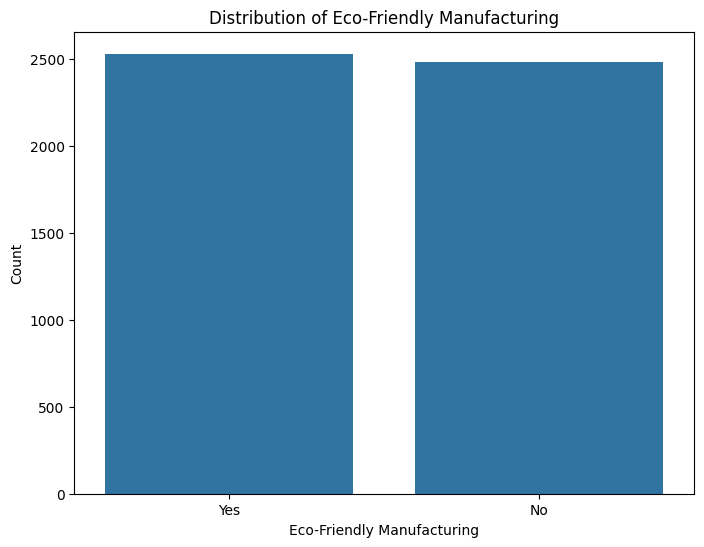

In [6]:
# prompt: plot a barchart of Eco_Friendly_Manufacturing

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame as defined in the previous code.
# If 'df' is not available, load it again here:
# df = pd.read_csv('/content/fashion_sustainability_cleaned_final.csv')


# Calculate the value counts for each category in the 'Eco_Friendly_Manufacturing' column
eco_friendly_counts = df['Eco_Friendly_Manufacturing'].value_counts()

# Create the bar chart using seaborn
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.barplot(x=eco_friendly_counts.index, y=eco_friendly_counts.values)
plt.xlabel('Eco-Friendly Manufacturing')
plt.ylabel('Count')
plt.title('Distribution of Eco-Friendly Manufacturing')
plt.show()


In [7]:
# --- Multinomial Naïve Bayes Pipeline ---
# Preprocessing: OneHotEncoder transforms categorical features into a binary matrix.
pipeline_multi = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore')),
    ('clf', MultinomialNB())
])
pipeline_multi.fit(X_train, y_train)
y_pred_multi = pipeline_multi.predict(X_test)
accuracy_multi = accuracy_score(y_test, y_pred_multi)
print("Multinomial NB accuracy:", accuracy_multi)

# --- Bernoulli Naïve Bayes Pipeline ---
# Also using OneHotEncoder to generate binary features suitable for Bernoulli NB.
pipeline_bernoulli = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore')),
    ('clf', BernoulliNB())
])
pipeline_bernoulli.fit(X_train, y_train)
y_pred_bernoulli = pipeline_bernoulli.predict(X_test)
accuracy_bernoulli = accuracy_score(y_test, y_pred_bernoulli)
print("Bernoulli NB accuracy:", accuracy_bernoulli)

# --- Categorical Naïve Bayes Pipeline ---
# Preprocessing: OrdinalEncoder converts each categorical feature into integer codes.
pipeline_categorical = Pipeline([
    ('encoder', OrdinalEncoder()),
    ('clf', CategoricalNB())
])
pipeline_categorical.fit(X_train, y_train)
y_pred_categorical = pipeline_categorical.predict(X_test)
accuracy_categorical = accuracy_score(y_test, y_pred_categorical)
print("Categorical NB accuracy:", accuracy_categorical)


Multinomial NB accuracy: 0.5139627659574468
Bernoulli NB accuracy: 0.5146276595744681
Categorical NB accuracy: 0.5139627659574468


In [8]:
from sklearn.model_selection import GridSearchCV

# --- Hyperparameter Tuning for MultinomialNB ---
pipeline_multi_ht = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore')),
    ('clf', MultinomialNB())
])
param_grid_multi = {'clf__alpha': [0.1, 0.5, 1.0, 2.0]}
grid_multi = GridSearchCV(pipeline_multi_ht, param_grid_multi, cv=5)
grid_multi.fit(X_train, y_train)
print("Best parameters for MultinomialNB:", grid_multi.best_params_)
print("Tuned MultinomialNB accuracy:", accuracy_score(y_test, grid_multi.predict(X_test)))

# --- Hyperparameter Tuning for BernoulliNB ---
pipeline_bernoulli_ht = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore')),
    ('clf', BernoulliNB())
])
param_grid_bernoulli = {
    'clf__alpha': [0.1, 0.5, 1.0, 2.0],
    'clf__binarize': [0.0, 0.5, 1.0]
}
grid_bernoulli = GridSearchCV(pipeline_bernoulli_ht, param_grid_bernoulli, cv=5)
grid_bernoulli.fit(X_train, y_train)
print("Best parameters for BernoulliNB:", grid_bernoulli.best_params_)
print("Tuned BernoulliNB accuracy:", accuracy_score(y_test, grid_bernoulli.predict(X_test)))



Best parameters for MultinomialNB: {'clf__alpha': 2.0}
Tuned MultinomialNB accuracy: 0.5152925531914894
Best parameters for BernoulliNB: {'clf__alpha': 0.1, 'clf__binarize': 1.0}
Tuned BernoulliNB accuracy: 0.5126329787234043


In [9]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report

# Evaluate MultinomialNB
y_pred_multi = pipeline_multi.predict(X_test)
cm_multi = confusion_matrix(y_test, y_pred_multi)
print("Confusion Matrix - MultinomialNB:")
print(cm_multi)
report_multi = classification_report(y_test, y_pred_multi, output_dict=True)
df_report_multi = pd.DataFrame(report_multi).transpose()
print("\nClassification Report - MultinomialNB:")
print(df_report_multi[['precision', 'recall', 'f1-score', 'support']])

# Evaluate BernoulliNB
y_pred_bernoulli = pipeline_bernoulli.predict(X_test)
cm_bernoulli = confusion_matrix(y_test, y_pred_bernoulli)
print("\nConfusion Matrix - BernoulliNB:")
print(cm_bernoulli)
report_bernoulli = classification_report(y_test, y_pred_bernoulli, output_dict=True)
df_report_bernoulli = pd.DataFrame(report_bernoulli).transpose()
print("\nClassification Report - BernoulliNB:")
print(df_report_bernoulli[['precision', 'recall', 'f1-score', 'support']])

# Evaluate CategoricalNB
y_pred_categorical = pipeline_categorical.predict(X_test)
cm_categorical = confusion_matrix(y_test, y_pred_categorical)
print("\nConfusion Matrix - CategoricalNB:")
print(cm_categorical)
report_categorical = classification_report(y_test, y_pred_categorical, output_dict=True)
df_report_categorical = pd.DataFrame(report_categorical).transpose()
print("\nClassification Report - CategoricalNB:")
print(df_report_categorical[['precision', 'recall', 'f1-score', 'support']])

# Create a summary table using the weighted average metrics for each model
summary = {
    'MultinomialNB': report_multi['weighted avg'],
    'BernoulliNB': report_bernoulli['weighted avg'],
    'CategoricalNB': report_categorical['weighted avg']
}



Confusion Matrix - MultinomialNB:
[[339 394]
 [337 434]]

Classification Report - MultinomialNB:
              precision    recall  f1-score      support
No             0.501479  0.462483  0.481192   733.000000
Yes            0.524155  0.562905  0.542839   771.000000
accuracy       0.513963  0.513963  0.513963     0.513963
macro avg      0.512817  0.512694  0.512016  1504.000000
weighted avg   0.513103  0.513963  0.512795  1504.000000

Confusion Matrix - BernoulliNB:
[[335 398]
 [332 439]]

Classification Report - BernoulliNB:
              precision    recall  f1-score      support
No             0.502249  0.457026  0.478571   733.000000
Yes            0.524492  0.569390  0.546020   771.000000
accuracy       0.514628  0.514628  0.514628     0.514628
macro avg      0.513371  0.513208  0.512296  1504.000000
weighted avg   0.513652  0.514628  0.513148  1504.000000

Confusion Matrix - CategoricalNB:
[[339 394]
 [337 434]]

Classification Report - CategoricalNB:
              precision    

In [10]:
summary_df = pd.DataFrame(summary).transpose()
print("\nSummary Table (Weighted Average Metrics):")
print(summary_df[['precision', 'recall', 'f1-score', 'support']])


Summary Table (Weighted Average Metrics):
               precision    recall  f1-score  support
MultinomialNB   0.513103  0.513963  0.512795   1504.0
BernoulliNB     0.513652  0.514628  0.513148   1504.0
CategoricalNB   0.513103  0.513963  0.512795   1504.0


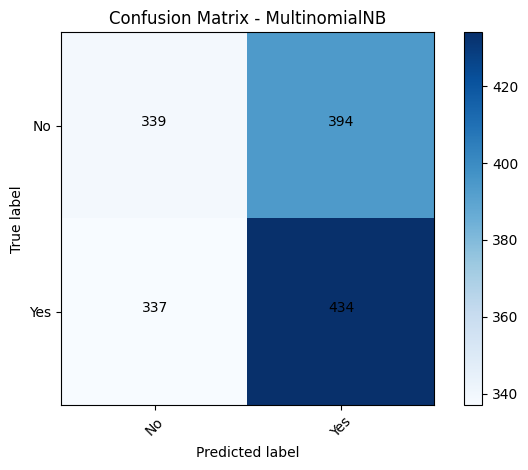

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(cm, classes, title):
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     horizontalalignment="center",
                     color="Black" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

# Get unique classes from y_test for labeling the axes
classes = np.unique(y_test)

# Plot the confusion matrices for each model
plot_confusion_matrix(cm_multi, classes, 'Confusion Matrix - MultinomialNB')



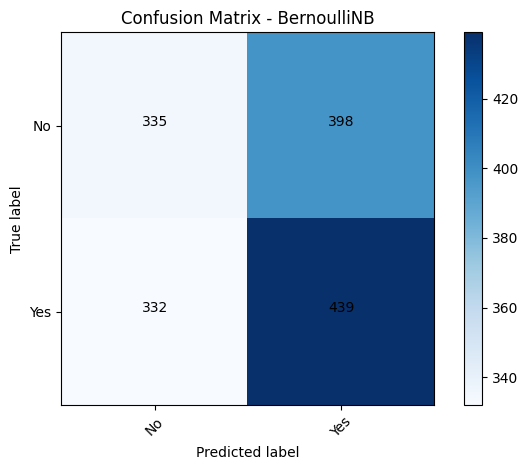

In [12]:
plot_confusion_matrix(cm_bernoulli, classes, 'Confusion Matrix - BernoulliNB')


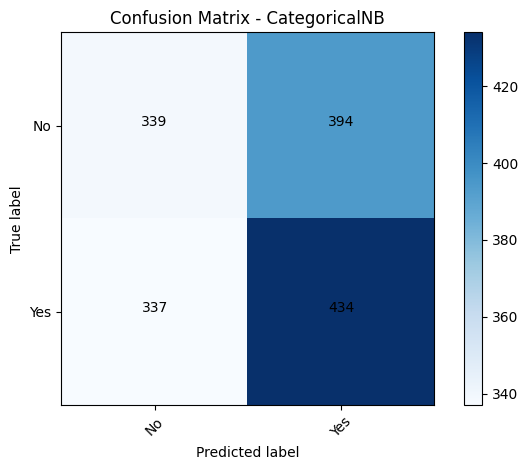

In [13]:
plot_confusion_matrix(cm_categorical, classes, 'Confusion Matrix - CategoricalNB')

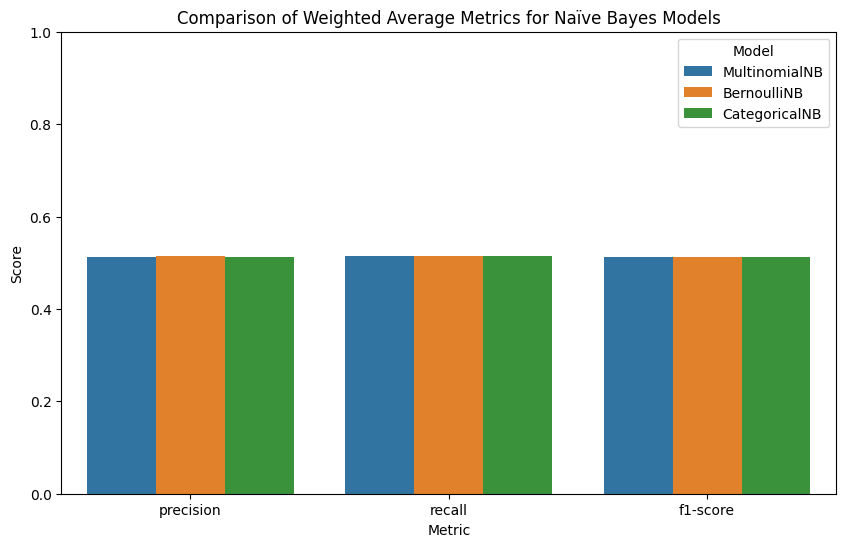

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a summary dictionary from the weighted averages in the classification reports
summary = {
    'MultinomialNB': report_multi['weighted avg'],
    'BernoulliNB': report_bernoulli['weighted avg'],
    'CategoricalNB': report_categorical['weighted avg']
}

# Convert the summary dictionary to a DataFrame and reset the index
summary_df = pd.DataFrame(summary).transpose().reset_index().rename(columns={'index': 'Model'})

# Select the metrics to plot (excluding support)
metrics = ['precision', 'recall', 'f1-score']

# Melt the DataFrame for plotting with seaborn
melted = pd.melt(summary_df, id_vars='Model', value_vars=metrics, var_name='Metric', value_name='Score')

# Plot the barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=melted, x='Metric', y='Score', hue='Model')
plt.title('Comparison of Weighted Average Metrics for Naïve Bayes Models')
plt.ylim(0, 1)
plt.show()


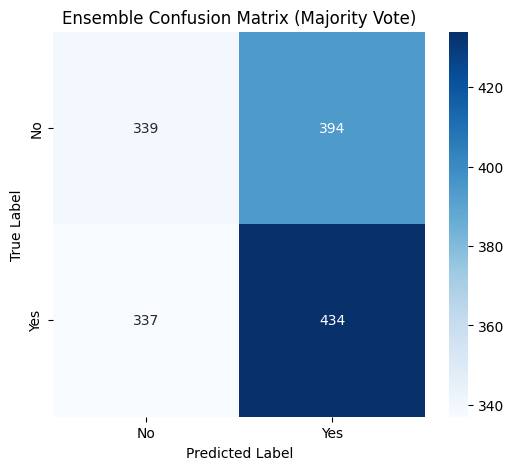

In [15]:
import numpy as np
from statistics import mode
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

ensemble_preds = []
for i in range(len(X_test)):
    preds = [y_pred_multi[i], y_pred_bernoulli[i], y_pred_categorical[i]]
    ensemble_preds.append(mode(preds))

cm_ensemble = confusion_matrix(y_test, ensemble_preds)

def plot_confusion_matrix(cm, class_labels, title='Ensemble Confusion Matrix (Majority Vote)'):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_labels, yticklabels=class_labels)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


classes = sorted(np.unique(y_test))

plot_confusion_matrix(cm_ensemble, classes)


In [16]:
from sklearn.model_selection import GridSearchCV

# --- Multinomial Naive Bayes Tuning ---
pipeline_multi = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore')),
    ('clf', MultinomialNB())
])

param_grid_multi = {
    'clf__alpha': [0.1, 0.5, 1.0, 2.0, 5.0]
}

grid_multi = GridSearchCV(pipeline_multi, param_grid_multi, cv=5, scoring='accuracy')
grid_multi.fit(X_train, y_train)
print("Best MultinomialNB alpha:", grid_multi.best_params_['clf__alpha'])
print("Best MultinomialNB Accuracy:", grid_multi.best_score_)

# --- Bernoulli Naive Bayes Tuning ---
pipeline_bernoulli = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore')),
    ('clf', BernoulliNB())
])

param_grid_bernoulli = {
    'clf__alpha': [0.1, 0.5, 1.0, 2.0, 5.0]
}

grid_bernoulli = GridSearchCV(pipeline_bernoulli, param_grid_bernoulli, cv=5, scoring='accuracy')
grid_bernoulli.fit(X_train, y_train)
print("Best BernoulliNB alpha:", grid_bernoulli.best_params_['clf__alpha'])
print("Best BernoulliNB Accuracy:", grid_bernoulli.best_score_)

# --- Categorical Naive Bayes Tuning ---
pipeline_categorical = Pipeline([
    ('encoder', OrdinalEncoder()),
    ('clf', CategoricalNB())
])

param_grid_categorical = {
    'clf__alpha': [0.1, 0.5, 1.0, 2.0, 5.0]
}

grid_categorical = GridSearchCV(pipeline_categorical, param_grid_categorical, cv=5, scoring='accuracy')
grid_categorical.fit(X_train, y_train)
print("Best CategoricalNB alpha:", grid_categorical.best_params_['clf__alpha'])
print("Best CategoricalNB Accuracy:", grid_categorical.best_score_)


Best MultinomialNB alpha: 2.0
Best MultinomialNB Accuracy: 0.5004263343778323
Best BernoulliNB alpha: 5.0
Best BernoulliNB Accuracy: 0.5018516486419482
Best CategoricalNB alpha: 2.0
Best CategoricalNB Accuracy: 0.5004263343778323


In [17]:
import pandas as pd

# Create a DataFrame to display the model accuracies
accuracy_table = pd.DataFrame({
    'Model': ['Multinomial Naive Bayes', 'Bernoulli Naive Bayes', 'Categorical Naive Bayes'],
    'Accuracy': [accuracy_multi, accuracy_bernoulli, accuracy_categorical]
})

print("\nModel Accuracy Comparison:")
print(accuracy_table)



Model Accuracy Comparison:
                     Model  Accuracy
0  Multinomial Naive Bayes  0.513963
1    Bernoulli Naive Bayes  0.514628
2  Categorical Naive Bayes  0.513963


In [18]:
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline  # Important for SMOTE compatibility

# Define the categorical features
categorical_features = X.columns.tolist()

# OneHotEncode the categorical features
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Apply preprocessing
X_train_enc = preprocessor.fit_transform(X_train)
X_test_enc = preprocessor.transform(X_test)

# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_enc, y_train)

# You can now train your model on X_train_resampled and y_train_resampled
# For example, with MultinomialNB:
model = MultinomialNB()
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test_enc)

# Evaluate
from sklearn.metrics import accuracy_score, classification_report
print("SMOTE + MultinomialNB Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


SMOTE + MultinomialNB Accuracy: 0.5186170212765957

Classification Report:
               precision    recall  f1-score   support

          No       0.51      0.47      0.49       733
         Yes       0.53      0.56      0.55       771

    accuracy                           0.52      1504
   macro avg       0.52      0.52      0.52      1504
weighted avg       0.52      0.52      0.52      1504



In [19]:
# BernoulliNB requires OneHotEncoded features (binary-style)
preprocessor_bernoulli = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Transform features
X_train_enc_bernoulli = preprocessor_bernoulli.fit_transform(X_train)
X_test_enc_bernoulli = preprocessor_bernoulli.transform(X_test)

# Apply SMOTE
X_train_resampled_bernoulli, y_train_resampled_bernoulli = smote.fit_resample(X_train_enc_bernoulli, y_train)

# Train BernoulliNB
model_bernoulli = BernoulliNB()
model_bernoulli.fit(X_train_resampled_bernoulli, y_train_resampled_bernoulli)
y_pred_bernoulli = model_bernoulli.predict(X_test_enc_bernoulli)

# Evaluate
print("SMOTE + BernoulliNB Accuracy:", accuracy_score(y_test, y_pred_bernoulli))
print("\nClassification Report (BernoulliNB):\n", classification_report(y_test, y_pred_bernoulli))


SMOTE + BernoulliNB Accuracy: 0.5159574468085106

Classification Report (BernoulliNB):
               precision    recall  f1-score   support

          No       0.50      0.46      0.48       733
         Yes       0.53      0.57      0.55       771

    accuracy                           0.52      1504
   macro avg       0.51      0.51      0.51      1504
weighted avg       0.52      0.52      0.51      1504



In [20]:
# CategoricalNB requires ordinal encoded (integer-based) features
preprocessor_categorical = ColumnTransformer([
    ('cat', OrdinalEncoder(), categorical_features)
])

# Transform features
X_train_enc_categorical = preprocessor_categorical.fit_transform(X_train)
X_test_enc_categorical = preprocessor_categorical.transform(X_test)

# Apply SMOTE
X_train_resampled_categorical, y_train_resampled_categorical = smote.fit_resample(X_train_enc_categorical, y_train)

# Train CategoricalNB
model_categorical = CategoricalNB()
model_categorical.fit(X_train_resampled_categorical, y_train_resampled_categorical)
y_pred_categorical = model_categorical.predict(X_test_enc_categorical)

# Evaluate
print("SMOTE + CategoricalNB Accuracy:", accuracy_score(y_test, y_pred_categorical))
print("\nClassification Report (CategoricalNB):\n", classification_report(y_test, y_pred_categorical))


SMOTE + CategoricalNB Accuracy: 0.5146276595744681

Classification Report (CategoricalNB):
               precision    recall  f1-score   support

          No       0.50      0.47      0.49       733
         Yes       0.53      0.56      0.54       771

    accuracy                           0.51      1504
   macro avg       0.51      0.51      0.51      1504
weighted avg       0.51      0.51      0.51      1504



In [22]:
import pandas as pd

# Replace these with your actual accuracy values from your model runs
accuracy_multi_smote = 0.52
accuracy_bernoulli_smote = 0.52
accuracy_categorical_smote = 0.51

# Create a DataFrame with the results
smote_accuracy_table = pd.DataFrame({
    'Model': [
        'Multinomial Naive Bayes (SMOTE)',
        'Bernoulli Naive Bayes (SMOTE)',
        'Categorical Naive Bayes (SMOTE)'
    ],
    'Accuracy': [
        accuracy_multi_smote,
        accuracy_bernoulli_smote,
        accuracy_categorical_smote
    ]
})

# Display the table
print("\nNaive Bayes Model Accuracy After SMOTE:\n")
print(smote_accuracy_table)



Naive Bayes Model Accuracy After SMOTE:

                             Model  Accuracy
0  Multinomial Naive Bayes (SMOTE)      0.52
1    Bernoulli Naive Bayes (SMOTE)      0.52
2  Categorical Naive Bayes (SMOTE)      0.51


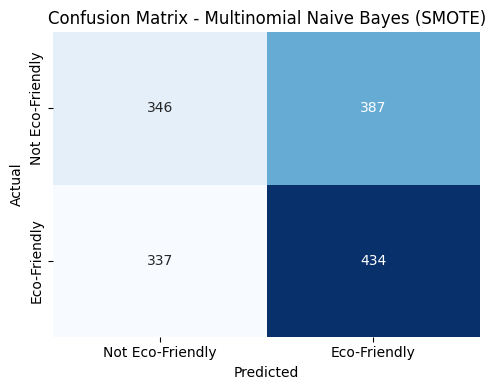

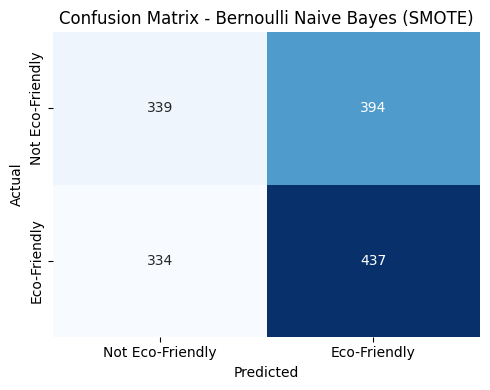

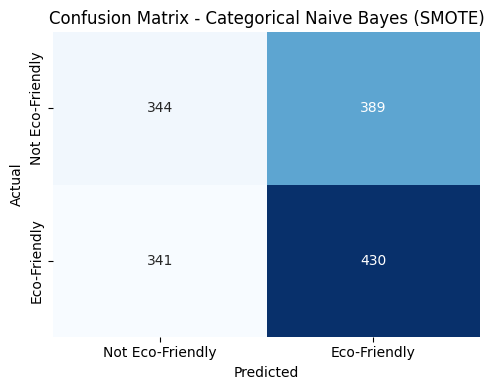

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define a helper function
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Eco-Friendly', 'Eco-Friendly'],
                yticklabels=['Not Eco-Friendly', 'Eco-Friendly'])
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

# Plot for MultinomialNB
plot_confusion(y_test, y_pred, "Multinomial Naive Bayes (SMOTE)")

# Plot for BernoulliNB
plot_confusion(y_test, y_pred_bernoulli, "Bernoulli Naive Bayes (SMOTE)")

# Plot for CategoricalNB
plot_confusion(y_test, y_pred_categorical, "Categorical Naive Bayes (SMOTE)")
